# Speech Act Classification using Support Vector Machines 
Where the output is a single label

Generating the sentences and labels from the Excel sheet

In [47]:
import pandas as pd

In [48]:
raw_data = pd.read_csv("../data/adjusted-labels-prioritised-frequency.csv")

filtered_data = raw_data[raw_data["Label"] != "Other"]

In [49]:
sentences = filtered_data["Sentence"]
labels = filtered_data["Label"]

## Visualising the Data

In [50]:
filtered_data.head()

,Sentence,Label
0,at all how are you saying that we do not know ...,Action words
1,alpha confirm where you want foxtrot 6 over,Communications
2,charlie nothing is yet just to make sure it do...,Communications
3,this is charlie it looks like the fire spread ...,Reasoning words
4,i did not i will be checking our,Action words


Distribution of the data

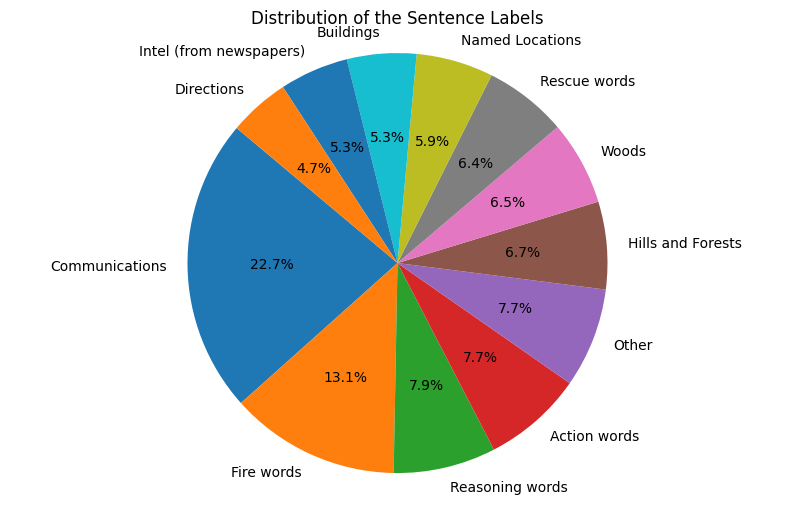

In [51]:
from matplotlib import pyplot as plt

label_counts = labels.value_counts()

plt.figure(figsize=(10, 6))
plt.pie(label_counts, labels=label_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Distribution of the Sentence Labels")
plt.axis("equal")
plt.show()

## Preprocessing

Separating the data into training and test data

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.2, random_state=1)

Vectorising based on the Tf-idf values in the data set

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create feature vectors
vectorizer = TfidfVectorizer(min_df=5,
                             max_df=0.8,
                             sublinear_tf=True,
                             use_idf=True)
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

Selecting the Linear Support Vector Classification model

In [54]:
from sklearn import svm

# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
classifier_rbf = svm.SVC(kernel="rbf")
classifier_polynomial = svm.SVC(kernel="poly")
classifier_sigmoid = svm.SVC(kernel="sigmoid")
classifier_sigmoid.fit(train_vectors, y_train)

SVC(kernel='sigmoid')

In [55]:
classifier_linear.fit(train_vectors, y_train)
classifier_rbf.fit(train_vectors, y_train)
classifier_polynomial.fit(train_vectors, y_train)

SVC(kernel='poly')

Evaluating Results

In [56]:
prediction_linear = classifier_linear.predict(test_vectors)
prediction_rbf = classifier_rbf.predict(test_vectors)
prediction_polynomial = classifier_polynomial.predict(test_vectors)
prediction_sigmoid = classifier_sigmoid.predict(test_vectors)

In [57]:
from sklearn.metrics import classification_report, accuracy_score

# results
report = classification_report(y_test, prediction_linear, zero_division=0)
print("Classification Report: Adjusted Label Frequency - Linear Kernel")
print(f"Accuracy: {accuracy_score(y_test, prediction_linear):.2f}")
print(report)

Classification Report: Adjusted Label Frequency - Linear Kernel
Accuracy: 0.81
                         precision    recall  f1-score   support

           Action words       0.81      0.62      0.70        42
              Buildings       0.68      0.81      0.74        21
         Communications       0.80      0.98      0.88       112
             Directions       0.95      0.64      0.77        28
             Fire words       0.88      0.95      0.91        66
      Hills and Forests       0.86      0.68      0.76        28
Intel (from newspapers)       0.90      0.67      0.77        27
        Named Locations       0.55      0.67      0.60        18
                  Other       0.84      0.75      0.79        36
        Reasoning words       0.89      0.82      0.85        39
           Rescue words       0.74      0.93      0.82        27
                  Woods       0.75      0.54      0.62        28

               accuracy                           0.81       472
         

In [58]:
# results
report = classification_report(y_test, prediction_rbf, zero_division=0)
print("Classification Report: Adjusted Label Frequency - RBF Kernel")
print(f"Accuracy: {accuracy_score(y_test, prediction_rbf):.2f}")
print(report)

Classification Report: Adjusted Label Frequency - RBF Kernel
Accuracy: 0.73
                         precision    recall  f1-score   support

           Action words       0.78      0.50      0.61        42
              Buildings       0.75      0.57      0.65        21
         Communications       0.62      0.99      0.76       112
             Directions       1.00      0.39      0.56        28
             Fire words       0.73      0.94      0.82        66
      Hills and Forests       0.95      0.64      0.77        28
Intel (from newspapers)       0.94      0.59      0.73        27
        Named Locations       0.53      0.44      0.48        18
                  Other       1.00      0.42      0.59        36
        Reasoning words       0.85      0.85      0.85        39
           Rescue words       0.75      0.89      0.81        27
                  Woods       0.71      0.43      0.53        28

               accuracy                           0.73       472
            

In [59]:
# results
report = classification_report(y_test, prediction_polynomial, zero_division=0)
print("Classification Report: Adjusted Label Frequency - Polynomial Kernel")
print(f"Accuracy: {accuracy_score(y_test, prediction_polynomial):.2f}")
print(report)

Classification Report: Adjusted Label Frequency - Polynomial Kernel
Accuracy: 0.34
                         precision    recall  f1-score   support

           Action words       0.00      0.00      0.00        42
              Buildings       0.75      0.14      0.24        21
         Communications       0.27      0.99      0.43       112
             Directions       0.00      0.00      0.00        28
             Fire words       0.61      0.33      0.43        66
      Hills and Forests       1.00      0.11      0.19        28
Intel (from newspapers)       1.00      0.15      0.26        27
        Named Locations       0.00      0.00      0.00        18
                  Other       0.75      0.08      0.15        36
        Reasoning words       0.88      0.18      0.30        39
           Rescue words       0.50      0.04      0.07        27
                  Woods       1.00      0.18      0.30        28

               accuracy                           0.34       472
     

In [60]:
# results
report = classification_report(y_test, prediction_sigmoid, zero_division=0)
print("Classification Report: Adjusted Label Frequency - Sigmoid Kernel")
print(f"Accuracy: {accuracy_score(y_test, prediction_sigmoid):.2f}")
print(report)

Classification Report: Adjusted Label Frequency - Sigmoid Kernel
Accuracy: 0.80
                         precision    recall  f1-score   support

           Action words       0.81      0.62      0.70        42
              Buildings       0.62      0.71      0.67        21
         Communications       0.81      0.98      0.89       112
             Directions       0.94      0.57      0.71        28
             Fire words       0.80      0.95      0.87        66
      Hills and Forests       0.90      0.64      0.75        28
Intel (from newspapers)       0.90      0.67      0.77        27
        Named Locations       0.57      0.72      0.63        18
                  Other       0.85      0.78      0.81        36
        Reasoning words       0.89      0.82      0.85        39
           Rescue words       0.76      0.93      0.83        27
                  Woods       0.75      0.54      0.62        28

               accuracy                           0.80       472
        